## Importar librerias 

In [1]:
import pandas as pd
import os
import re
import nltk
from nltk import FreqDist
from nltk import ngrams
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import io
from gensim.models import word2vec
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
import pickle
from sklearn.metrics.pairwise import cosine_similarity
import datetime as dt
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/ScrapingProyectosLey/Codigos/src/')
from filter_words import run_stopword_statistics
from filter_words import make_stopwords_filter
from filter_words import remove_stopwords_from_list_texts

In [3]:
os.chdir("/content/drive/My Drive/Colab Notebooks/Noticias_BCRP/notebooks/")

## Cargar la data 

In [4]:
df_noticias_total=pd.read_pickle("../data/raw/df_noticias_total.pkl")
print(df_noticias_total.shape)
df_noticias_total.head()

(76565, 2)


,Texto,Target
0,© BANCO CENTRAL DE RESERVA DEL PERU\n\nDeparta...,1
1,dIZ207\n\n* FINANZAS.:.- -\n\nMomento de reest...,1
2,",\nx¿ºQ Denartamento de Prensa\n\nALUEVES Y1 D...",1
3,TrO7\n\n \n\nECONOMISTA GONTÁLEZ IZQUIERDO\n\n...,1
4,% Departamento de Prensa\n\nLA RAZÓN\n\nRECOMI...,1


## Limpieza de Texto

In [5]:
import re
def clean_text_noticias(news):
    clean_news = []
    for new in news:
        sin_guiones=re.sub('(\S)-\n', r'\1', new.lower()) ### sin guiones
        # sin_guiones=re.sub('(\S)\n-', r'\1', sin_guiones.lower()) ### sin guiones
        sin_character = re.sub(r'[^\w\s]', '', sin_guiones) ##busca los signos, caracteristicas especiales
        sin_numero = re.sub("\d+", "", sin_character)##busca los numeros y los elimina
        sin_tildes=sin_numero.translate(str.maketrans('áéíóúü','aeiouu'))
        sin_tildes = " ".join([i for i in sin_tildes.split() if len(i)>2])##solo palabras que tengan mas de tres caracteres
        clean_news.append(sin_tildes)     
    return clean_news
df_noticias_total["Texto_Limpio"]=clean_text_noticias(df_noticias_total["Texto"])
print(df_noticias_total.shape)
df_noticias_total.head()

(76565, 3)


,Texto,Target,Texto_Limpio
0,© BANCO CENTRAL DE RESERVA DEL PERU\n\nDeparta...,1,banco central reserva del peru departamento pr...
1,dIZ207\n\n* FINANZAS.:.- -\n\nMomento de reest...,1,diz finanzas momento reestructurar las deudas ...
2,",\nx¿ºQ Denartamento de Prensa\n\nALUEVES Y1 D...",1,xºq denartamento prensa alueves icembreoel rep...
3,TrO7\n\n \n\nECONOMISTA GONTÁLEZ IZQUIERDO\n\n...,1,tro economista gontalez izquierdo recomiendan ...
4,% Departamento de Prensa\n\nLA RAZÓN\n\nRECOMI...,1,departamento prensa razon recomienda gonzalez ...


In [ ]:
# import collections
# from collections import Counter
# import datetime as dt
# Stopwords=stopwords.words("spanish") ### obtener la lista de stopwords en idioma español
# Stopwords=[i.translate(str.maketrans('áéíóúü','aeiouu')) for i in Stopwords]
# Stowwords_dict = Counter(Stopwords)
# last = dt.datetime.today()
# def remove_stopwords(news):
#     sin_stopwords=[]
#     for new in news:
#         content=[word for word in new.split() if Stowwords_dict[word]==0]
#         sin_stopwords.append(" ".join(content))
#     return sin_stopwords
# df_noticias_total["Texto_Stopwords"]=remove_stopwords(df_noticias_total["Texto_Limpio"])
# print(df_noticias_total.shape)
# df_noticias_total.head()
# now = dt.datetime.today()
# print(now-last)

0:00:07.090442


## Remover Stopwords

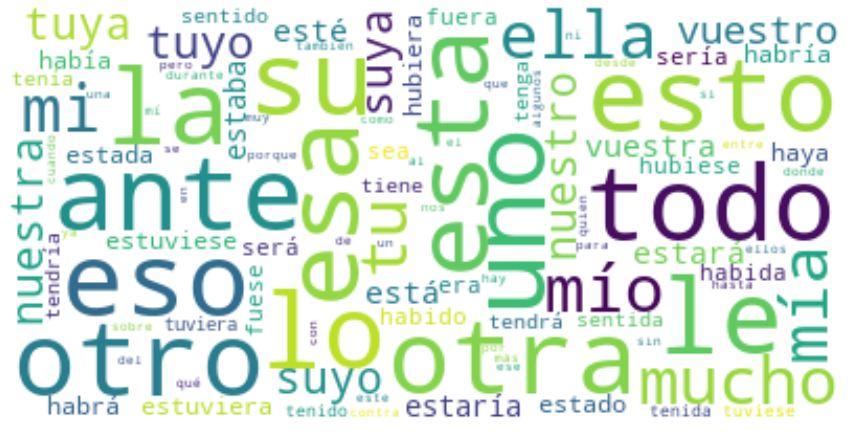

In [5]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')
Stopwords=stopwords.words("spanish") ### obtener la lista de stopwords en idioma español
plt.figure(figsize=(15,15))
wordcloud = WordCloud(max_words=100,min_font_size=5,max_font_size=50,background_color="white").generate(" ".join(Stopwords))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [6]:
Stopwords=stopwords.words("spanish") ### obtener la lista de stopwords en idioma español
Stopwords=[i.translate(str.maketrans('áéíóúü','aeiouu')) for i in Stopwords]
def remove_stopwords(news):
    sin_stopwords=[]
    for new in news:
        content=[word for word in new.split() if word not in Stopwords]
        sin_stopwords.append(" ".join(content))
    return sin_stopwords
df_noticias_total["Texto_Stopwords"]=remove_stopwords(df_noticias_total["Texto_Limpio"])
print(df_noticias_total.shape)
df_noticias_total.head()

(76565, 4)


,Texto,Target,Texto_Limpio,Texto_Stopwords
0,© BANCO CENTRAL DE RESERVA DEL PERU\n\nDeparta...,1,banco central reserva del peru departamento pr...,banco central reserva peru departamento prensa...
1,dIZ207\n\n* FINANZAS.:.- -\n\nMomento de reest...,1,diz finanzas momento reestructurar las deudas ...,diz finanzas momento reestructurar deudas peia...
2,",\nx¿ºQ Denartamento de Prensa\n\nALUEVES Y1 D...",1,xºq denartamento prensa alueves icembreoel rep...,xºq denartamento prensa alueves icembreoel rep...
3,TrO7\n\n \n\nECONOMISTA GONTÁLEZ IZQUIERDO\n\n...,1,tro economista gontalez izquierdo recomiendan ...,tro economista gontalez izquierdo recomiendan ...
4,% Departamento de Prensa\n\nLA RAZÓN\n\nRECOMI...,1,departamento prensa razon recomienda gonzalez ...,departamento prensa razon recomienda gonzalez ...


In [ ]:
df_noticias_total.to_pickle("../data/cleaned/df_noticias_total_cleaned.pkl")
# df_noticias_bcrp=pd.read_pickle("../data/cleaned/df_noticias_total_cleaned.pkl")

## Remover Stopwords con Teoria de la Información

In [ ]:
list_texts = [[h.strip() for h in doc.split()  ] for doc in df_noticias_total["Texto_Stopwords"]]
## number of realizations for the random null model
N_s = 10
## get the statistics
df_statistics = run_stopword_statistics(list_texts,N_s=N_s)
## look at the entries
df_statistics.sort_values(by='F',ascending=False).head()
df_statistics

,F,I,tfidf,H,H-tilde,H-tilde_std,N
___,3.063257e-05,2.521153e-01,6.121534,8.377603,8.629719,5.693141e-03,399
____,2.379974e-06,0.000000e+00,7.811908,4.954196,4.954196,8.429370e-08,31
_____,1.151600e-06,0.000000e+00,8.537845,3.906891,3.906891,5.960464e-08,15
______,9.212804e-07,0.000000e+00,8.760989,3.584963,3.584963,0.000000e+00,12
_______,6.909603e-07,4.440892e-16,9.048671,3.169925,3.169925,0.000000e+00,9
...,...,...,...,...,...,...,...
王ōrey,7.677336e-08,0.000000e+00,11.245895,0.000000,0.000000,0.000000e+00,1
界kai,7.677336e-08,0.000000e+00,11.245895,0.000000,0.000000,0.000000e+00,1
鸿蒙nde,7.677336e-08,0.000000e+00,11.245895,0.000000,0.000000,0.000000e+00,1
두마리치킨ㅋㅋㅋㅋㅋㅋ시발ㅋㅋㅋㅋ,7.677336e-08,0.000000e+00,11.245895,0.000000,0.000000,0.000000e+00,1


In [7]:
# df_statistics.to_pickle("../data/intermediated/df_statistics_total.pkl")
list_texts = [[h.strip() for h in doc.split() ] for doc in df_noticias_total["Texto_Stopwords"]]
df_statistics=pd.read_pickle("../data/intermediated/df_statistics_total.pkl")

In [8]:
## seleccionando el metodo de remover stopwords
method = 'INFOR'
cutoff_type = 'p'
cutoff_val = 0.60
df_filter = make_stopwords_filter(df_statistics,
                                  method = method,
                                  cutoff_type = cutoff_type, 
                                  cutoff_val = cutoff_val )

In [9]:
df_filter

,F-cumsum,S
prensa,0.002715,-0.534488
departamento,0.005139,-0.467846
pagina,0.006393,-0.239456
paginas,0.007328,-0.202239
fecha,0.008802,-0.139162
...,...,...
migracion,0.599700,0.413844
olivos,0.599708,0.413851
monumental,0.599745,0.413907
colorado,0.599753,0.414069


In [10]:
## get the list of words from df_filter and get a filtered list_of_texts
list_words_filter = list(df_filter.index)
list_texts_filter = remove_stopwords_from_list_texts(list_texts, list_words_filter)
print('Original text:', list_texts[10])
print('Filtered text:', list_texts_filter[10])
N = sum([ len(doc) for doc in list_texts ])
N_filter = sum([ len(doc) for doc in list_texts_filter ])
print('Remaining fraction of tokens',N_filter/N)

Original text: ['ica', 'vende', 'millones', 'alañoaunqueen', 'recibio', 'competencia', 'interesa', 'sumar', 'nuevos', 'proyectos', 'año', 'pasado', 'ofrecido', 'proyectos', 'venta', 'evaluamos', 'desechamos', 'preferfamosinvertir', 'activos', 'oportunidad', 'rendimiento', 'mejor', 'revisaremos', 'parametrossiguen', 'verunaposibilidad', 'denuevos', 'proyectos', 'buscamos', 'llegar', 'hacia', 'donderindemascadasol', 'invirtamos', 'proyecto', 'nuevo', 'haremos', 'banco', 'terrenos', 'pueden', 'lanzar', 'nuevosmalls', 'terrenos', 'hñc', 'centenario', 'vocacion', 'comercial', 'exista', 'gente', 'mudada', 'proyectos', 'residenciales', 'puede', 'desarrollar', 'oferta', 'comercial', 'terrenos', 'calculamos', 'puede', 'ser', 'años', 'primeto', 'entrar', 'servicios', 'financieros', 'minka', 'puede', 'replicar', 'otraszonas', 'pensamos', 'limitante', 'espacio', 'porelcosto', 'lado', 'queremos', 'llevar', 'espiritu', 'minkaa', 'camino', 'real', 'proyectos', 'diametralmente', 'opuestos', 'pareceria

In [18]:
df_noticias_total["Clean_Stopword_Info"]=[" ".join(i).strip() for i in list_texts_filter]
df_noticias_total = df_noticias_total[["Texto","Target","Texto_Stopwords","Clean_Stopword_Info"]].copy()
print(df_noticias_total.shape)
df_noticias_total.head()

(76565, 4)


,Texto,Target,Texto_Stopwords,Clean_Stopword_Info
0,© BANCO CENTRAL DE RESERVA DEL PERU\n\nDeparta...,1,banco central reserva peru departamento prensa...,banco peru ene
1,dIZ207\n\n* FINANZAS.:.- -\n\nMomento de reest...,1,diz finanzas momento reestructurar deudas peia...,deudas costo financiamiento empresas años tasa...
2,",\nx¿ºQ Denartamento de Prensa\n\nALUEVES Y1 D...",1,xºq denartamento prensa alueves icembreoel rep...,ene construccion gasoducto sur publico app eco...
3,TrO7\n\n \n\nECONOMISTA GONTÁLEZ IZQUIERDO\n\n...,1,tro economista gontalez izquierdo recomiendan ...,economista izquierdo tipo cambio economista jo...
4,% Departamento de Prensa\n\nLA RAZÓN\n\nRECOMI...,1,departamento prensa razon recomienda gonzalez ...,gonzalez izquierdo tipo cambio economista jorg...


In [19]:
df_noticias_total["Num_Words"]=df_noticias_total["Clean_Stopword_Info"].apply(lambda x:len(x.split()))
df_noticias_total["Num_Words"].describe()

count    76565.000000
mean        68.087769
std         52.779500
min          0.000000
25%         32.000000
50%         54.000000
75%         92.000000
max        920.000000
Name: Num_Words, dtype: float64

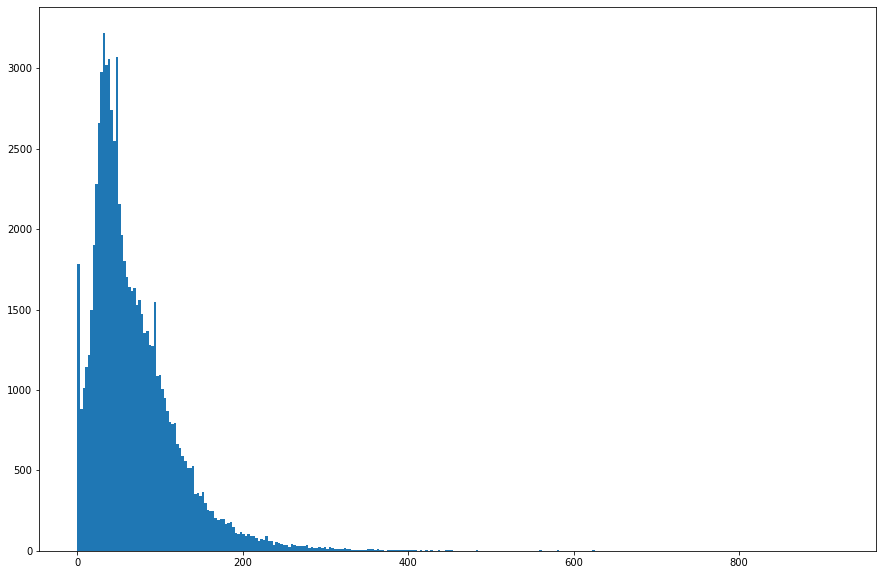

In [20]:
plt.figure(figsize=(15,10))
plt.hist(df_noticias_total["Num_Words"],bins=300)
plt.show()

### Balancear los datos

In [ ]:
### 37 y 25

In [21]:
df_noticias_total=df_noticias_total[((df_noticias_total["Target"]==1) & (df_noticias_total["Num_Words"]>25))  
                                     | ((df_noticias_total["Target"]==0) & (df_noticias_total["Num_Words"]>25))].copy()
df_noticias_total.index=[i for i in range(0,len(df_noticias_total))]
print(df_noticias_total.shape)
df_noticias_total.head()

(61197, 5)


,Texto,Target,Texto_Stopwords,Clean_Stopword_Info,Num_Words
0,dIZ207\n\n* FINANZAS.:.- -\n\nMomento de reest...,1,diz finanzas momento reestructurar deudas peia...,deudas costo financiamiento empresas años tasa...,80
1,",\nx¿ºQ Denartamento de Prensa\n\nALUEVES Y1 D...",1,xºq denartamento prensa alueves icembreoel rep...,ene construccion gasoducto sur publico app eco...,249
2,TrO7\n\n \n\nECONOMISTA GONTÁLEZ IZQUIERDO\n\n...,1,tro economista gontalez izquierdo recomiendan ...,economista izquierdo tipo cambio economista jo...,70
3,- 4 ENEL 2016 pégna 22\n\nFecha\n\nGESTIÓN\n\n...,1,enel pegna fecha gestion departamento prensa d...,inversionistas estrategia acciones rentabilida...,106
4,"SiegoHarrero,geren-\ntedeinversionesde AFP\nHa...",1,siegoharrerogerentedeinversionesde afp habitat...,afp europa japon cambiarias acciones cobertura...,138


1    30920
0    30277
Name: Target, dtype: int64


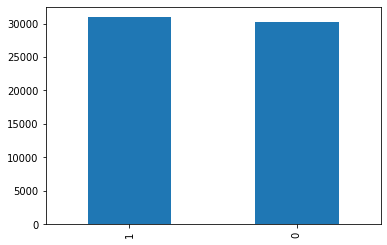

In [ ]:
### ver la distribucion de los datos
print(df_noticias_total["Target"].value_counts())
df_noticias_total["Target"].value_counts().plot.bar()
plt.show()

In [ ]:
df_noticias_total.to_pickle("../data/cleaned/df_noticias_total_cleanedInfo.pkl")

## Visualizacion del contenido pre-procesado

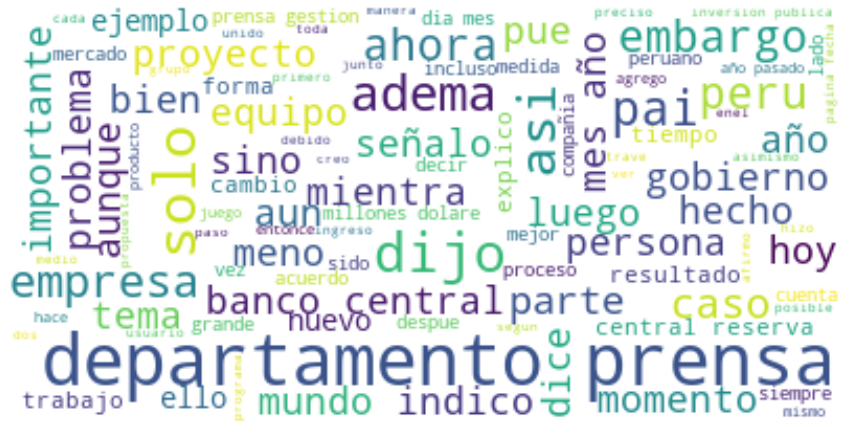

In [ ]:
### wordcloud de palabras recurrentes
plt.figure(figsize=(15,15))
wordcloud = WordCloud(max_words=100,min_font_size=5,max_font_size=50,background_color="white").generate(" ".join(df_noticias_total["Texto_Stopwords"]))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

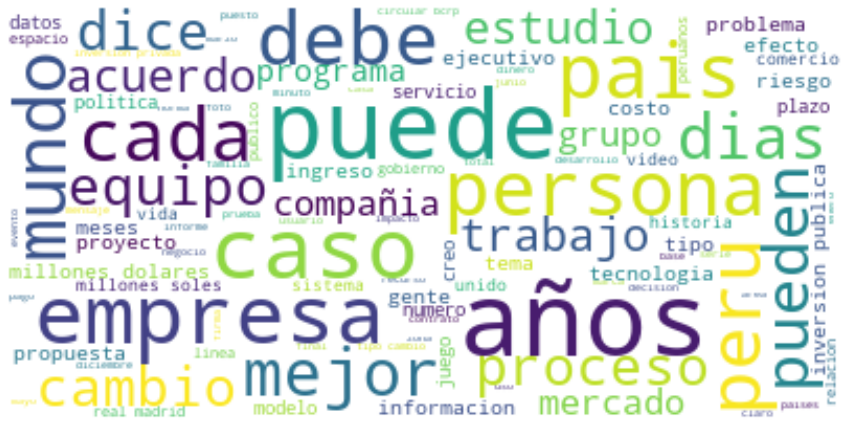

In [ ]:
### wordcloud de palabras recurrentes
plt.figure(figsize=(15,15))
wordcloud = WordCloud(max_words=100,min_font_size=5,max_font_size=50,background_color="white").generate(" ".join(df_noticias_total["Clean_Stopword_Info"]))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
## Histogramas de palabras mas frecuentes
plt.figure(figsize=(5,5))
frequencies = FreqDist( " ".join(df_noticias_total["Texto_Stopwords"]).split() )
plot = frequencies.plot( 10 )
print(plot)

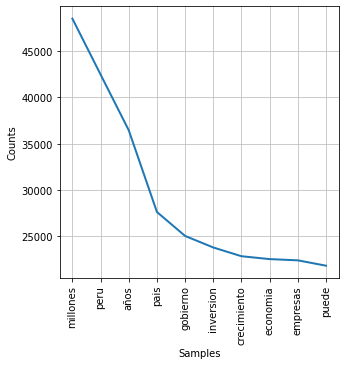

None


In [ ]:
## Histogramas de palabras mas frecuentes
plt.figure(figsize=(5,5))
frequencies = FreqDist( " ".join(df_noticias_total["Clean_Stopword_Info"]).split() )
plot = frequencies.plot( 10 )
print(plot)

In [ ]:
## Mostrando los ngramas
Ngrams  = ngrams(" ".join(df_noticias_total["Texto_Stopwords"]).split(), 3)
frequencies = FreqDist( Ngrams )
frequencies.most_common(10)

[(('banco', 'central', 'reserva'), 5921),
 (('departamento', 'prensa', 'gestion'), 5291),
 (('dia', 'mes', 'año'), 4714),
 (('central', 'reserva', 'peru'), 2556),
 (('central', 'reserva', 'bcr'), 2517),
 (('departamento', 'prensa', 'comercio'), 2082),
 (('paginas', 'departamento', 'prensa'), 2037),
 (('pedro', 'pablo', 'kuczynski'), 2017),
 (('pagina', 'departamento', 'prensa'), 1791),
 (('departamento', 'prensa', 'diario'), 1753)]

In [ ]:
## Mostrando los ngramas
Ngrams  = ngrams(" ".join(df_noticias_total["Clean_Stopword_Info"]).split(), 3)
frequencies = FreqDist( Ngrams )
frequencies.most_common(10)

[(('repo', 'compra', 'compromiso'), 1155),
 (('ministerio', 'economia', 'mef'), 1145),
 (('compra', 'compromiso', 'recompra'), 1130),
 (('banca', 'seguros', 'afp'), 1048),
 (('ministerio', 'energia', 'minas'), 835),
 (('bolsa', 'valores', 'lima'), 824),
 (('camara', 'comercio', 'lima'), 814),
 (('economia', 'alfredo', 'thorne'), 799),
 (('ministro', 'economia', 'alfredo'), 780),
 (('moneda', 'nacional', 'moneda'), 689)]

## Train Test


In [ ]:
### dividir los datos en train y test
y=df_noticias_total["Target"]
df_train, df_test = train_test_split(df_noticias_total, stratify=y, test_size = 0.20)
df_train.shape , df_test.shape

((48957, 6), (12240, 6))

In [ ]:
df_train.to_pickle("../data/preprocessed/df_train.pkl")
df_test.to_pickle("../data/preprocessed/df_test.pkl")

In [ ]:
### importar la api para emplear el text recognigtion
import pytesseract 
### indicar la direccion del programa previamente instalado, dicho programa almacena el modelo 
### pre-entrenado en español
pytesseract.pytesseract.tesseract_cmd = 'C://Users/hamil/AppData/Local/Tesseract-OCR/tesseract.exe'
### aplicar el reconocimiento de texto en español a una imagen 
pytesseract.image_to_string(imagenPag, lang='spa')


